In [1]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Seaborn as sns

In [2]:
df=pd.read_excel('diabetes dataset part 3 (1).xlsx')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df2=df['Outcome']

In [4]:
df1=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age','DiabetesPedigreeFunction']].replace(0,np.nan)
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,DiabetesPedigreeFunction
0,6.0,148.0,72.0,35.0,NaN,33.6,50,0.627
1,1.0,85.0,66.0,29.0,NaN,26.6,31,0.351
2,8.0,183.0,64.0,NaN,NaN,23.3,32,0.672
3,1.0,89.0,66.0,23.0,94.0,28.1,21,0.167
4,NaN,137.0,40.0,35.0,168.0,43.1,33,2.288


In [5]:
df1=df1.merge(df2,how='inner',left_index=True,right_index=True)
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,DiabetesPedigreeFunction,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,50,0.627,1
1,1.0,85.0,66.0,29.0,NaN,26.6,31,0.351,0
2,8.0,183.0,64.0,NaN,NaN,23.3,32,0.672,1
3,1.0,89.0,66.0,23.0,94.0,28.1,21,0.167,0
4,NaN,137.0,40.0,35.0,168.0,43.1,33,2.288,1


Text(0, 0.5, 'counts')

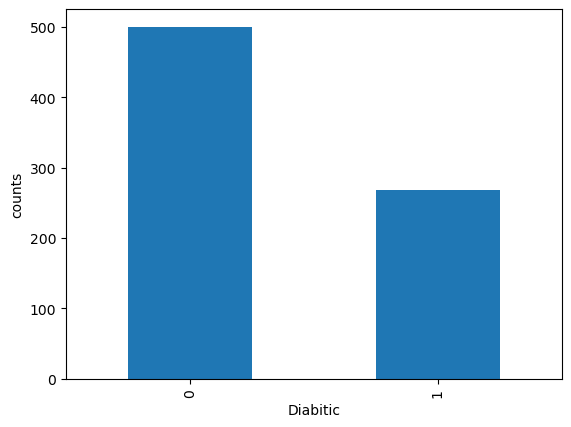

In [6]:
df['Outcome'].value_counts().plot(kind='bar')
plt.xlabel('Diabitic')
plt.ylabel('counts')

<Axes: >

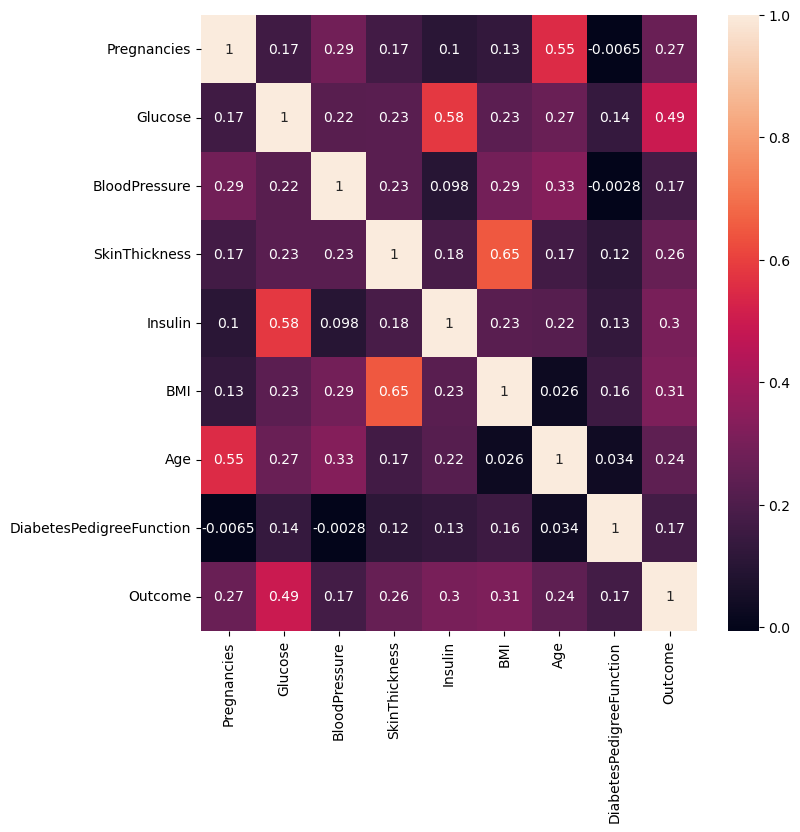

In [7]:
#Plotted the heatmapto check the correlation

plt.figure(figsize=(8,8))
sns.heatmap(df1.corr(),annot=True)

In [8]:
# General Statistics of our data

df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,DiabetesPedigreeFunction,Outcome
count,657.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,33.240885,0.471876,0.348958
std,3.217291,30.535641,12.382158,10.476982,118.775855,6.924988,11.760232,0.331329,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,21.000000,0.078000,0.000000
25%,2.000000,99.000000,64.000000,22.000000,76.250000,27.500000,24.000000,0.243750,0.000000
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,29.000000,0.372500,0.000000
75%,7.000000,141.000000,80.000000,36.000000,190.000000,36.600000,41.000000,0.626250,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,81.000000,2.420000,1.000000


In [9]:
#Divided the age into 4 age groups for better results

df1['Age']=pd.cut(df1['Age'],bins=[20,30,45,60,82],labels=[1,2,3,4])

In [10]:
#Glucose : filling null values of glucose by median wrt their Age

df1['Glucose'].fillna(df1.groupby('Age')['Glucose'].transform('median'),inplace=True)

#Divided the glucose values into two bins good(0-140 is normal range ) and bad

df1['Glucose']=pd.cut(df1['Glucose'],bins=[0,140,200],labels=['good','bad'])
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,DiabetesPedigreeFunction,Outcome
0,6.0,bad,72.0,35.0,NaN,33.6,3,0.627,1
1,1.0,good,66.0,29.0,NaN,26.6,2,0.351,0
2,8.0,bad,64.0,NaN,NaN,23.3,2,0.672,1
3,1.0,good,66.0,23.0,94.0,28.1,1,0.167,0
4,NaN,good,40.0,35.0,168.0,43.1,2,2.288,1


<Axes: xlabel='Glucose'>

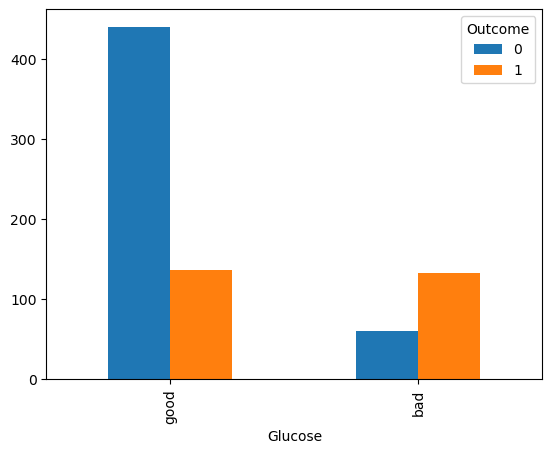

In [11]:
a=pd.crosstab(df1['Glucose'],df['Outcome'])
a.plot(kind='bar')

In [12]:
# Filling the null values with average values

df1['Pregnancies'].fillna(3,inplace=True)

df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,DiabetesPedigreeFunction,Outcome
0,6.0,bad,72.0,35.0,NaN,33.6,3,0.627,1
1,1.0,good,66.0,29.0,NaN,26.6,2,0.351,0
2,8.0,bad,64.0,NaN,NaN,23.3,2,0.672,1
3,1.0,good,66.0,23.0,94.0,28.1,1,0.167,0
4,3.0,good,40.0,35.0,168.0,43.1,2,2.288,1


In [13]:
#Fill null values of BP with their median values

y=df1['BloodPressure'].median()
df1['BloodPressure'].fillna(y,inplace=True)

#It is not possible to have BP less than 40 so replace the BP value which is less than 40 by 40

df1['BloodPressure']=df1['BloodPressure'].where(df1['BloodPressure']>40,40)
df1['BloodPressure']=pd.cut(df1['BloodPressure'],bins=[22,40,80,110,122],labels=['vlow','low','avg','high'])

In [14]:
#As insulin is highly corelated with glucose so filling the null values of insulin by its median wrt to glucose

df1['Insulin'].fillna(df1.groupby('Glucose')['Insulin'].transform('median'),inplace=True)
x=df1['BMI'].median()
df1['BMI'].fillna(x,inplace=True)

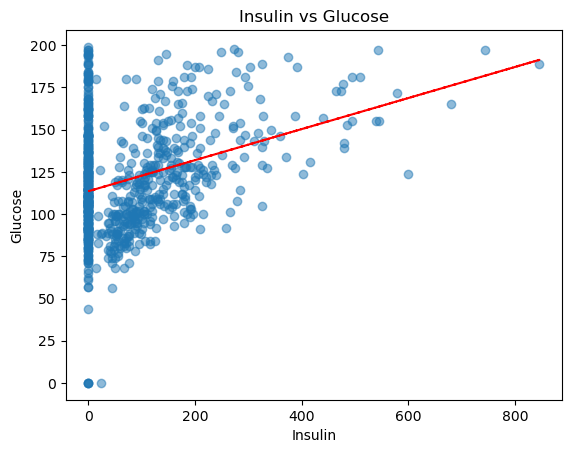

In [16]:
import matplotlib.pyplot as plt

# scatter plot of Insulin vs Glucose
plt.scatter(df['Insulin'], df['Glucose'], alpha=0.5)

# add a regression line
z = np.polyfit(df['Insulin'], df['Glucose'], 1)
p = np.poly1d(z)
plt.plot(df['Insulin'], p(df['Insulin']), 'r--')

# set labels and title
plt.xlabel('Insulin')
plt.ylabel('Glucose')
plt.title('Insulin vs Glucose')
plt.show()


In [17]:
z=df1['SkinThickness'].median()
df1['SkinThickness'].fillna(z,inplace=True)

In [18]:
df1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age', 'DiabetesPedigreeFunction', 'Outcome'],
      dtype='object')

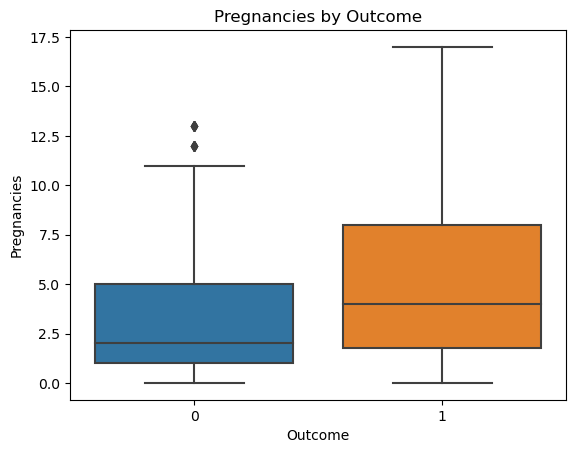

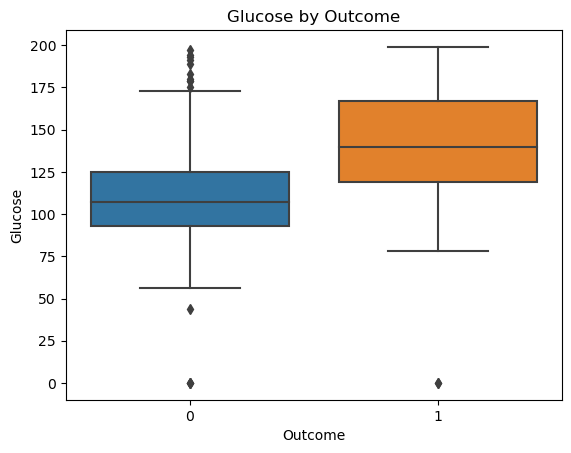

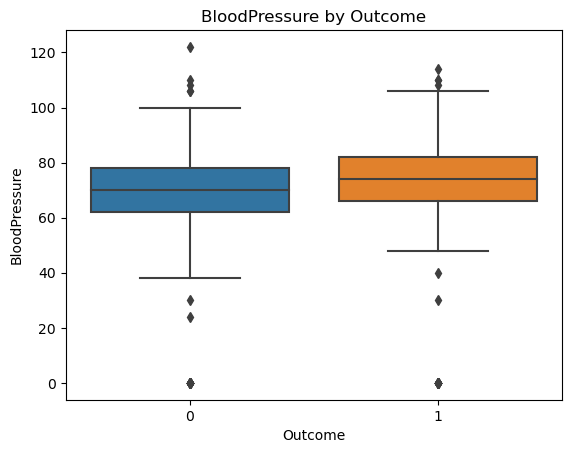

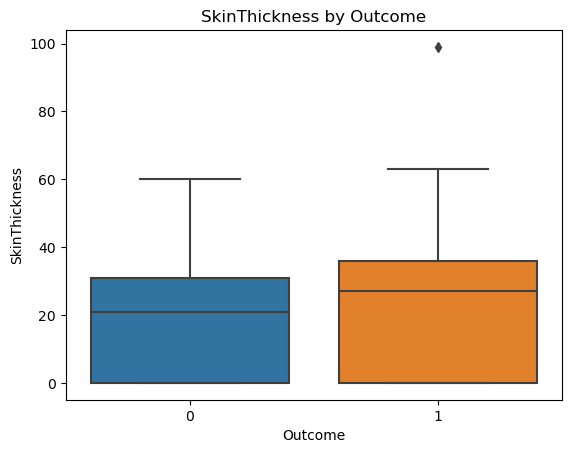

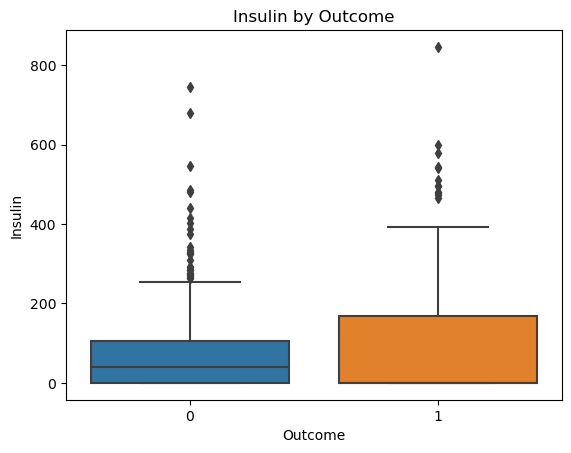

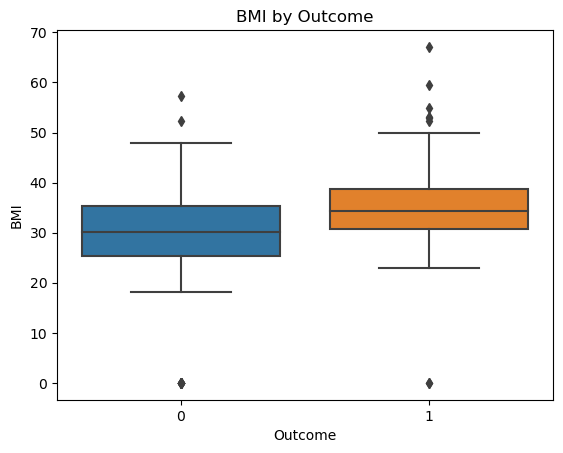

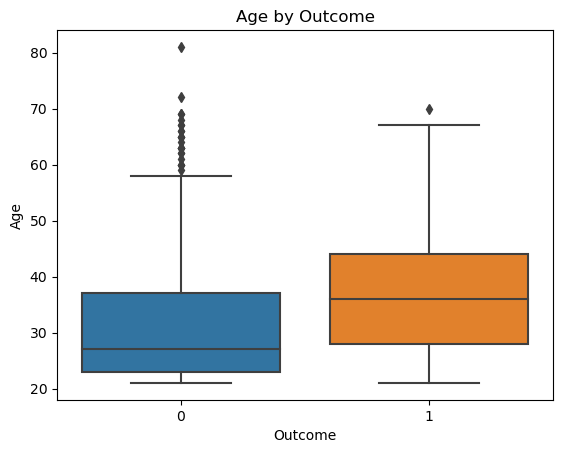

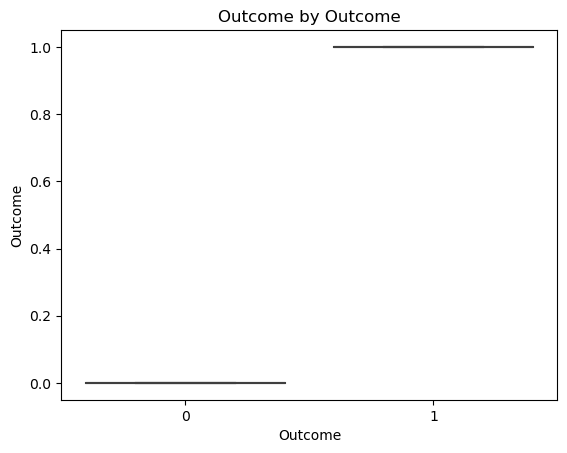

In [23]:

import seaborn as sns
import matplotlib.pyplot as plt

for feature in li1:
    plt.figure()
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.xlabel('Outcome')
    plt.ylabel(feature)
    plt.title(feature + ' by Outcome')
    plt.show()



In [24]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
Age                         0
DiabetesPedigreeFunction    0
Outcome                     0
dtype: int64

In [25]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,DiabetesPedigreeFunction,Outcome
0,6.0,bad,low,35.0,194.0,33.6,3,0.627,1
1,1.0,good,low,29.0,105.0,26.6,2,0.351,0
2,8.0,bad,low,29.0,194.0,23.3,2,0.672,1
3,1.0,good,low,23.0,94.0,28.1,1,0.167,0
4,3.0,good,vlow,35.0,168.0,43.1,2,2.288,1


<Axes: xlabel='Age'>

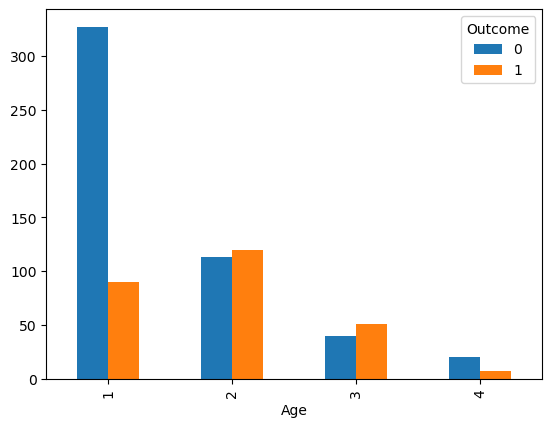

In [27]:
a=pd.crosstab(df1['Age'],df['Outcome'])
a.plot(kind='bar')